# 01 Data Exploration, EDA & Feature Engineering
I am using the [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download) dataset from kaggle.

This dataset contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Using this dataset, the goal is to predict customer churn behavior.

- customerID: Unique customer identification code
- gender: male or a female
- SeniorCitizen: Indicates if customer is 65 or older (1 = Y, 0 = N)
- Partner: Has a partner or not (Yes or No)
- Dependents: Lives with any dependents or not (Yes or No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Has a phone service or not (Yes or No)
- MultipleLines: Has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer's internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Has online security or not (Yes, No, No internet service)
- OnlineBackup: Has online backup or not (Yes, No, No internet service)
- DeviceProtection: Has device protection or not (Yes, No, No internet service)
- TechSupport: Has tech support or not (Yes, No, No internet service)
- StreamingTV: Has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Has streaming movies or not (Yes, No, No internet service)
- Contract: Contract term of the customer (Month-to-month, One year, Two years)
- PaperlessBilling: Has paperless billing or not (Yes, No)
- PaymentMethod: Payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card)
- MonthlyCharges: Amount charged to the customer monthly
- TotalCharges: Total amount charged to the customer
- Churn: Churned or not (Yes or No)

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set plot style
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
# Load the dataset
df = pd.read_csv('../data/Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Reorder the columns and move churn to the front
df = df[['Churn'] + [col for col in df.columns if col != 'Churn']]
df.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,No,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Yes,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,No,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Yes,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
# See number of features and observations
df.shape

(7043, 21)

In [6]:
# See if there are any null values
df.isnull().sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [7]:
# Checking for duplication
df.duplicated().sum()

0

In [8]:
# Checking data types
df.dtypes

Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [9]:
# See distribution of target variable
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
# Viewing unique values contained in each feature
df.nunique()

Churn                  2
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

## Data Cleaning
Data Cleaning tasks that I need to do:
- Label target variable
- Drop customerID column
- Fix datatype for TotalCharges field to numeric
- Mark missing values in TotalCharges as NaN and then drop the observations

TotalCharges are Nan because they were new customers who hadn't been charged yet. None of them have churned either.

In [12]:
# Label target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [13]:
# Drop customerID column
df.drop('customerID', axis=1, inplace=True)
df.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,1,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,1,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [14]:
# Converting TotalCharges column to numeric and marking errors like ' ' as NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Updated datatype: {df['TotalCharges'].dtypes}")
print(f"Total Null values created: {df['TotalCharges'].isna().sum()}")

Updated datatype: float64
Total Null values created: 11


In [15]:
# Drop rows where TotalCharges is NaN
df = df.dropna(subset=['TotalCharges'])
df.shape

(7032, 20)

## Explore & Plot Continuous Features

In [17]:
# Keep continuous features
df_cont = df[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']]
df_cont.head()

,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,1,2,53.85,108.15
3,0,45,42.30,1840.75
4,1,2,70.70,151.65


In [18]:
# Look at distribution of these features
df_cont.describe()

,Churn,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,32.421786,64.798208,2283.300441
std,0.441782,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,1.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
# Look at correlation matrix
df_cont.corr()

,Churn,tenure,MonthlyCharges,TotalCharges
Churn,1.000000,-0.354049,0.192858,-0.199484
tenure,-0.354049,1.000000,0.246862,0.825880
MonthlyCharges,0.192858,0.246862,1.000000,0.651065
TotalCharges,-0.199484,0.825880,0.651065,1.000000


In [20]:
from scipy import stats

def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(df_cont.groupby('Churn')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    churned = df_cont[df_cont['Churn']==1][feature]
    not_churned = df_cont[df_cont['Churn']==0][feature]
    tstat, pval = stats.ttest_ind(churned, not_churned, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [21]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    describe_cont_feature(feature)


*** Results for tenure ***
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
t-statistic: -35.0, p-value: 2.35e-234
None

*** Results for MonthlyCharges ***
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35
t-statistic: 18.3, p-value: 2.66e-72
None

*** Results for TotalCharges ***
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  18

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

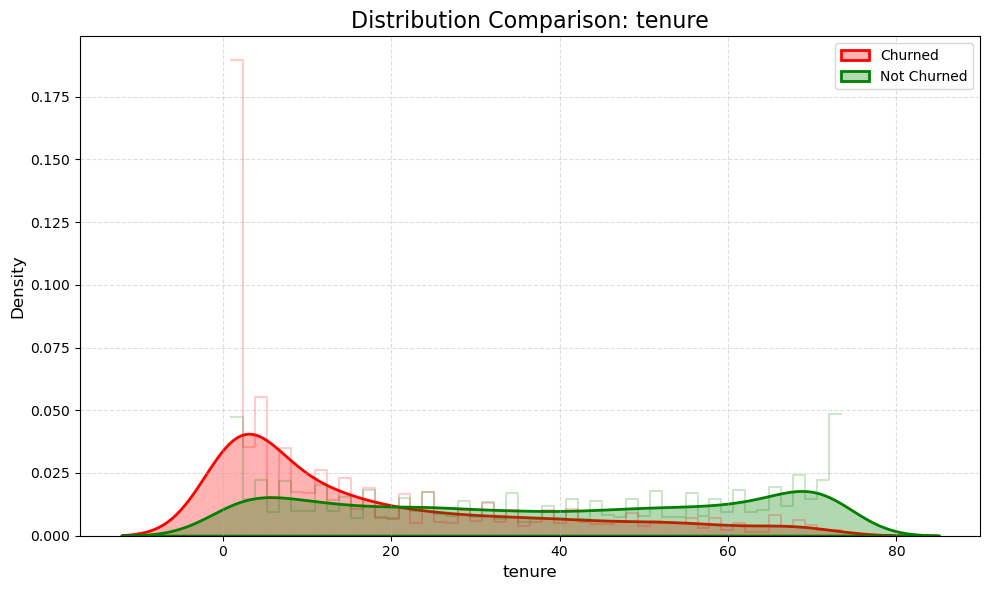

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

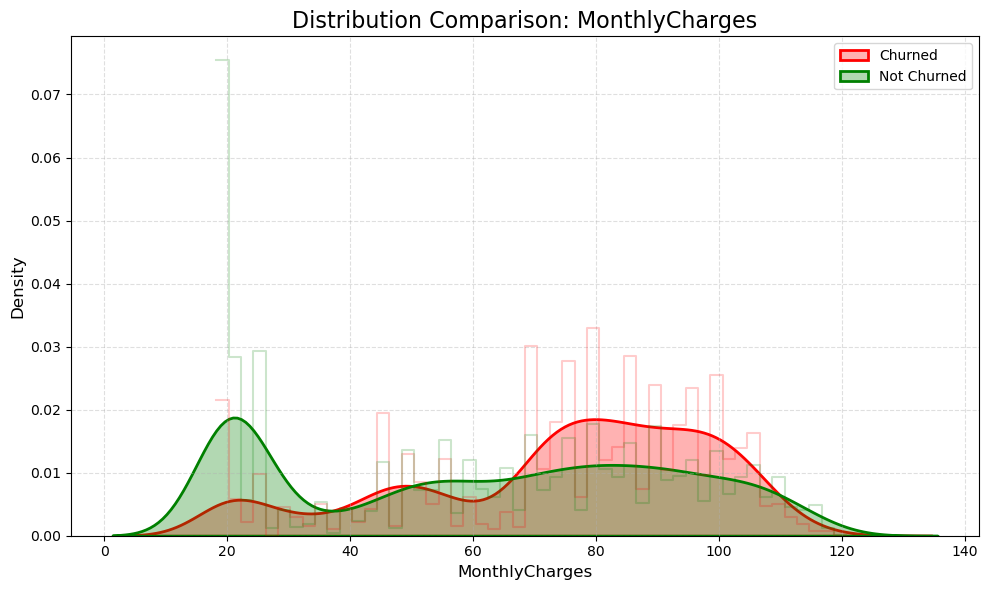

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

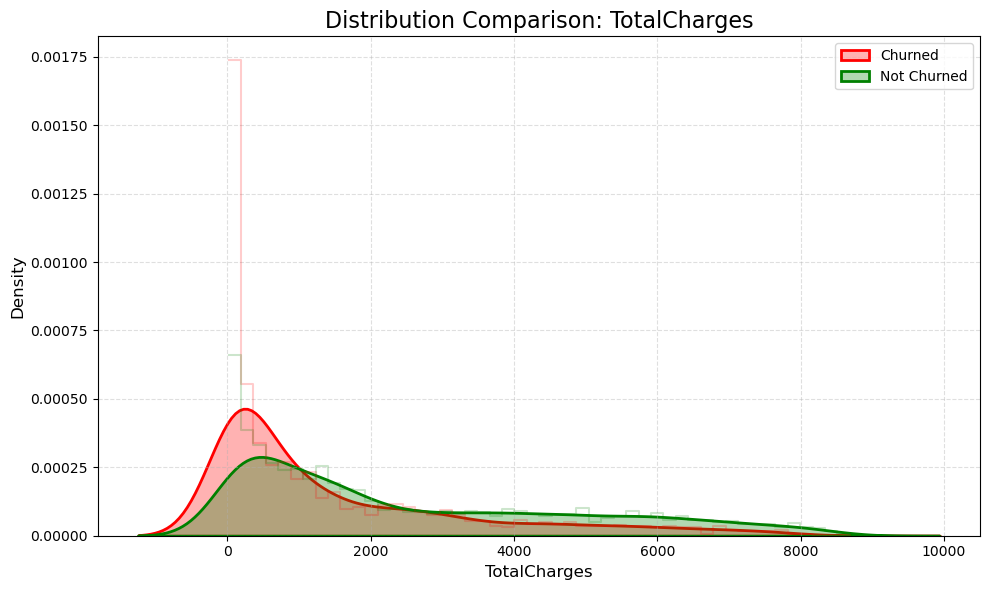

In [22]:
# Plot overlaid histogram for continuous features to view distribution between churned and not churned customers
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in features:
    churned = df_cont[df_cont['Churn'] == 1][col].dropna()
    not_churned = df_cont[df_cont['Churn'] == 0][col].dropna()

    # Define consistent bins
    xmin = min(churned.min(), not_churned.min())
    xmax = max(churned.max(), not_churned.max())
    bin_width = (xmax - xmin) / 50
    bins = np.arange(xmin, xmax + bin_width, bin_width)

    plt.figure(figsize=(10, 6))

    sns.kdeplot(churned, color='red', label='Churned', fill=True, alpha=0.3, linewidth=2)
    sns.kdeplot(not_churned, color='green', label='Not Churned', fill=True, alpha=0.3, linewidth=2)

    sns.histplot(churned, bins=bins, stat='density', color='red', alpha=0.2, element='step', fill=False)
    sns.histplot(not_churned, bins=bins, stat='density', color='green', alpha=0.2, element='step', fill=False)

    plt.title(f'Distribution Comparison: {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


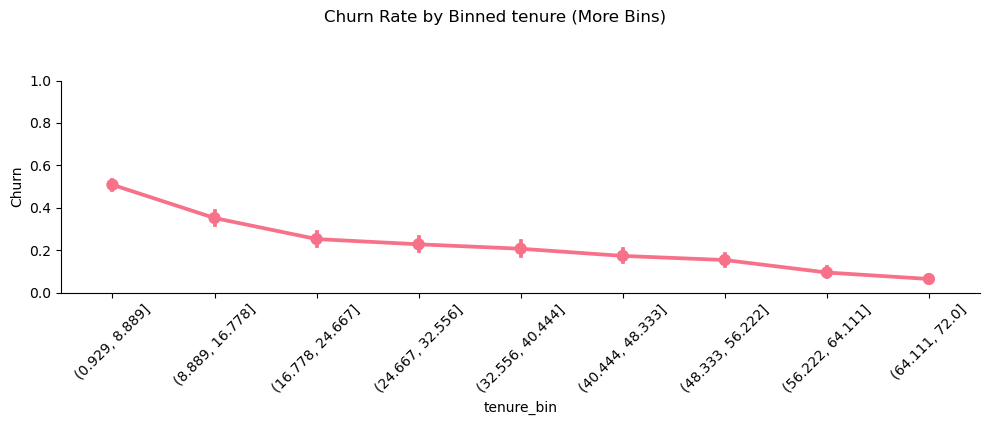

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


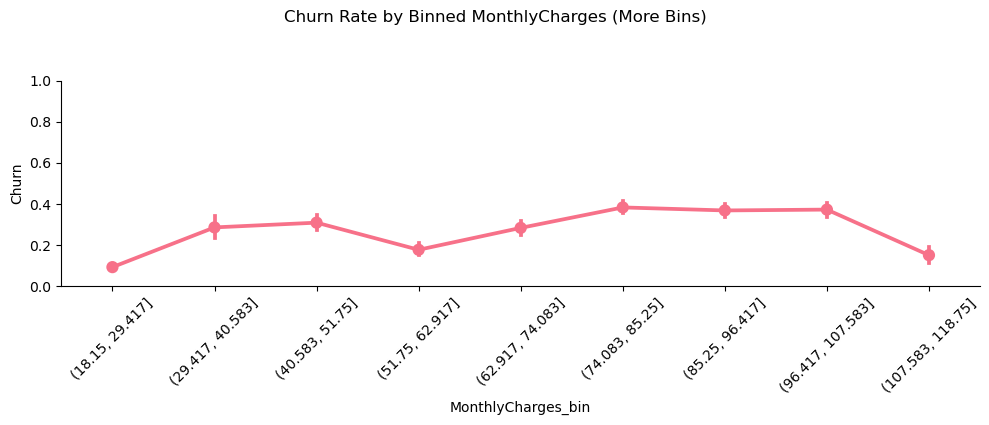

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


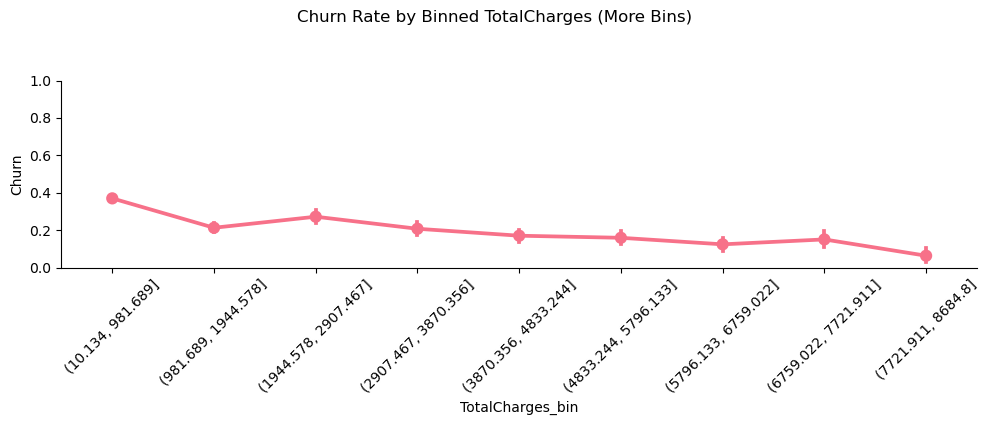

In [23]:
# Automatically define more bins (e.g., 8 to 10 bins)
bin_settings = {
    'tenure': 9,
    'MonthlyCharges': 9,
    'TotalCharges': 9
}

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    # Create bins locally
    binned = pd.cut(df[col], bins=bin_settings[col])

    # Make a temporary DataFrame for plotting with the binned column
    plot_df = df.assign(**{f'{col}_bin': binned})

    # Plot using seaborn's point plot
    g = sns.catplot(
        x=f'{col}_bin', y='Churn', data=plot_df,
        kind='point', aspect=2.5, height=4
    )
    g.set_xticklabels(rotation=45)
    g.set(ylim=(0, 1))
    g.fig.suptitle(f'Churn Rate by Binned {col} (More Bins)', y=1.05)
    plt.tight_layout()
    plt.show()

## Explore & Plot Categorical Features

In [25]:
# Drop all continous features
df_cat = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
df_cat.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,0,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,1,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,0,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [26]:
cat_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
# Check churn rate for each feature
for feature in cat_features:
    print(df_cat.groupby(feature)['Churn'].mean())
    print('')

gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64

SeniorCitizen
0    0.236503
1    0.416813
Name: Churn, dtype: float64

Partner
No     0.329761
Yes    0.197171
Name: Churn, dtype: float64

Dependents
No     0.312791
Yes    0.155312
Name: Churn, dtype: float64

PhoneService
No     0.250000
Yes    0.267475
Name: Churn, dtype: float64

MultipleLines
No                  0.250812
No phone service    0.250000
Yes                 0.286485
Name: Churn, dtype: float64

InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64

OnlineSecurity
No                     0.417787
No internet service    0.074342
Yes                    0.146402
Name: Churn, dtype: float64

OnlineBackup
No                     0.399417
No internet service    0.074342
Yes                    0.215670
Name: Churn, dtype: float64

DeviceProtection
No                     0.391403
No internet service    0.074342
Yes                    0.225393
Na

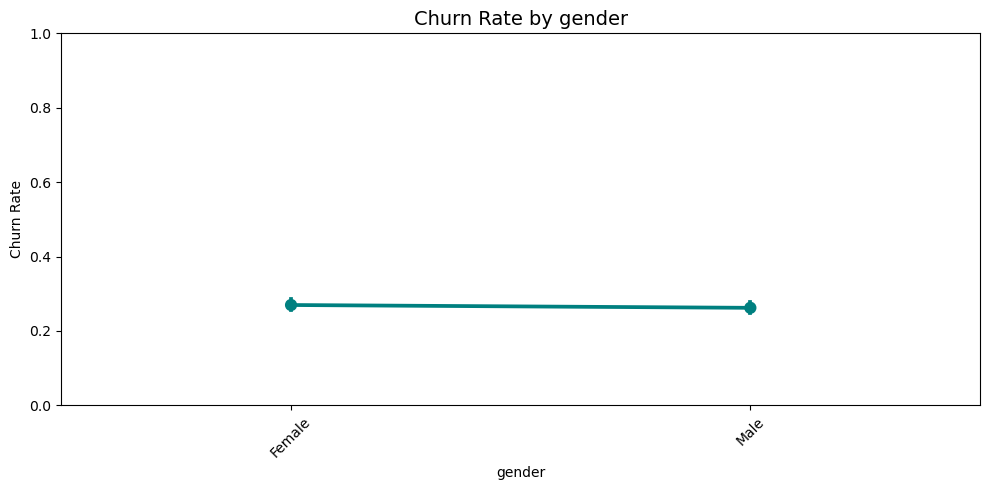

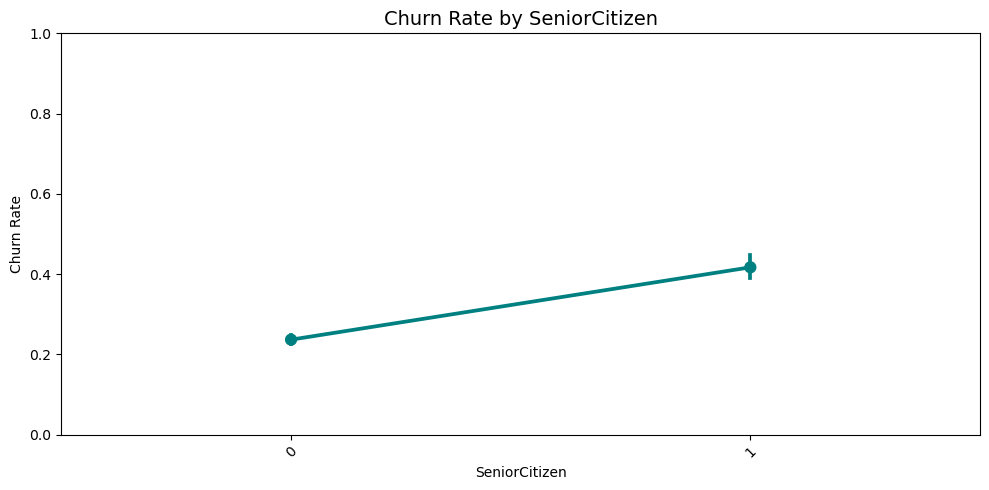

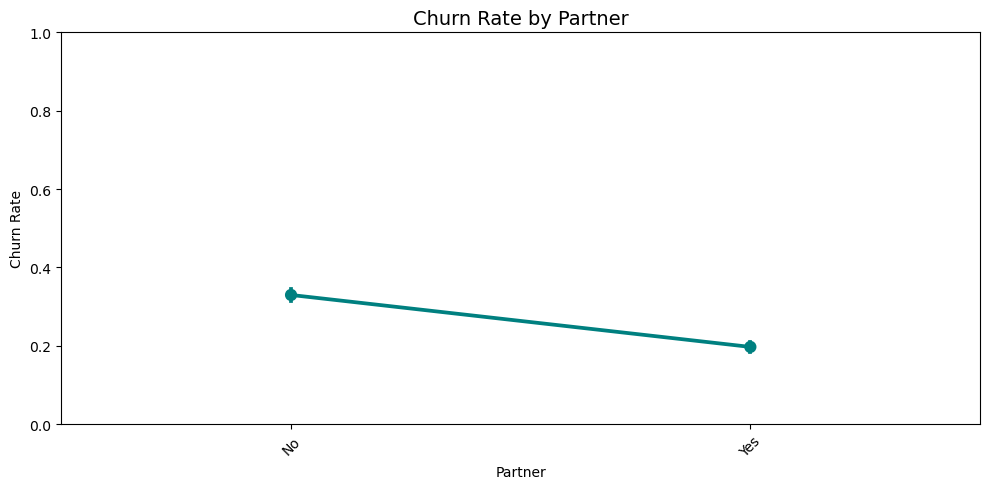

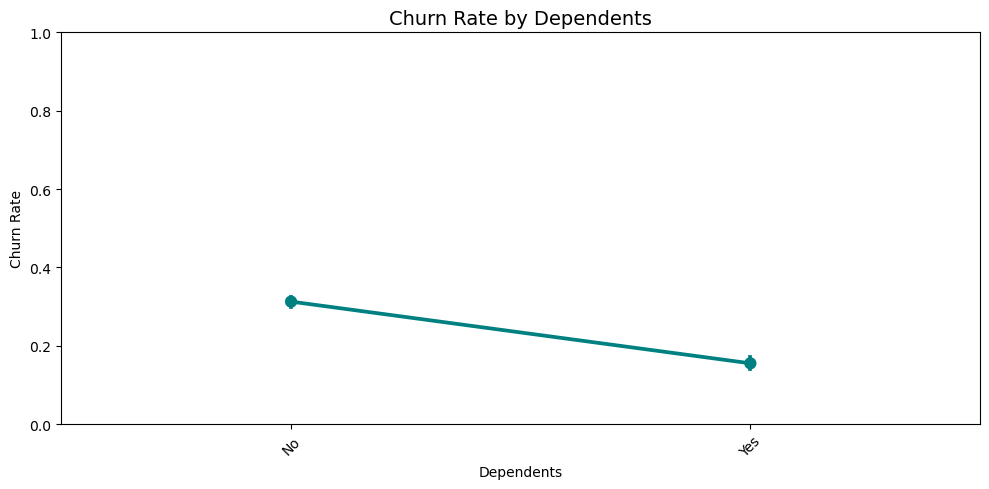

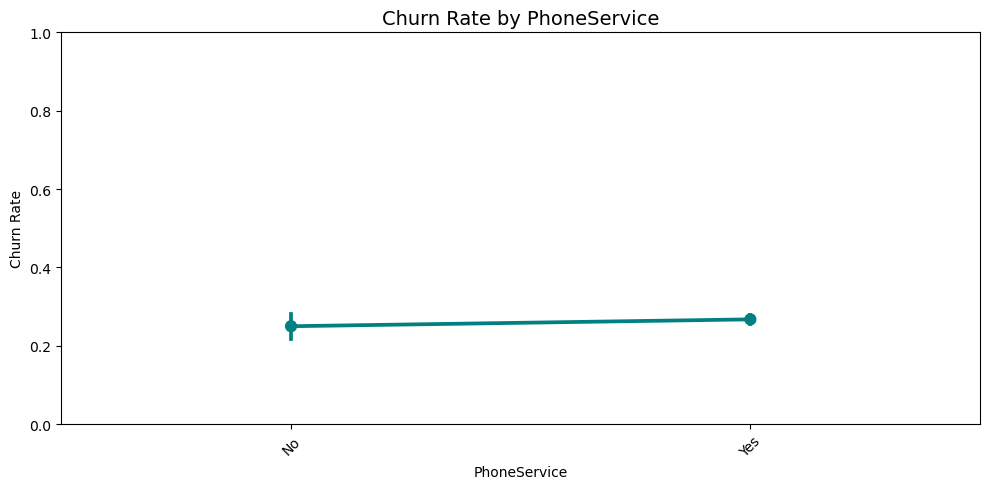

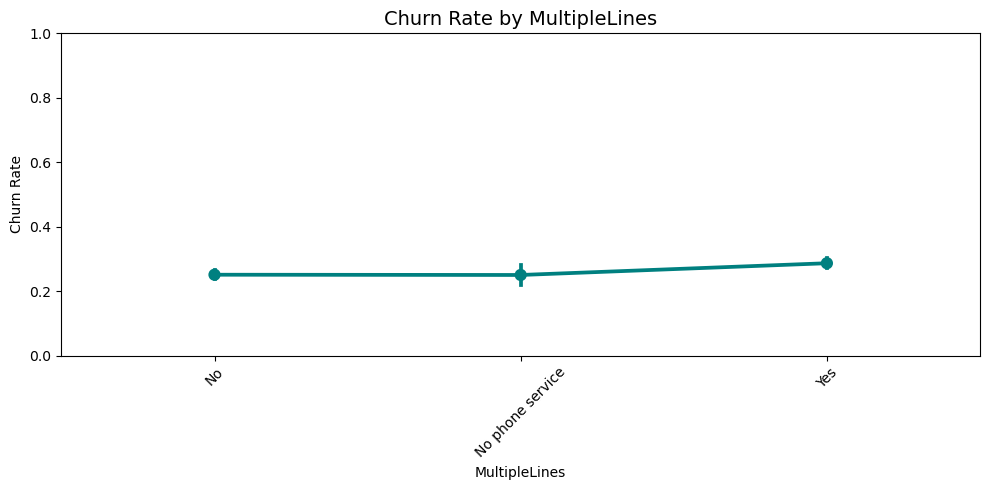

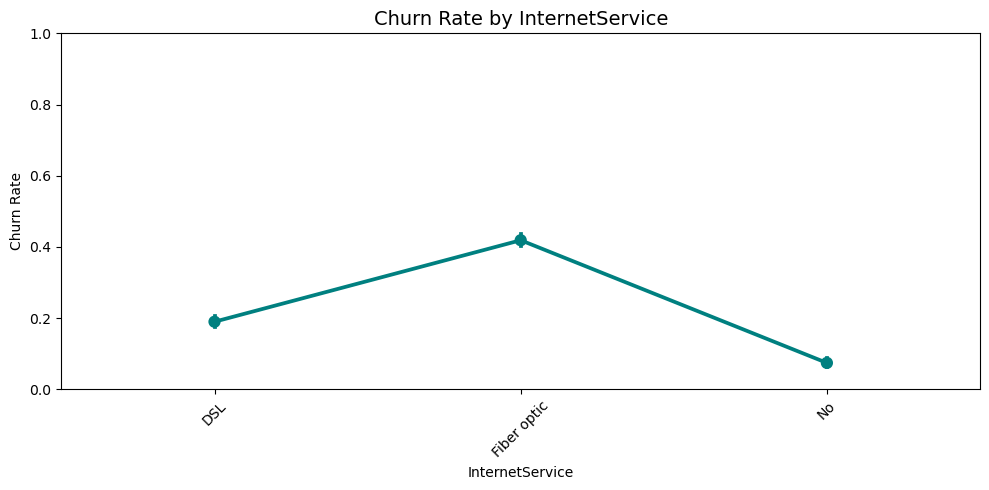

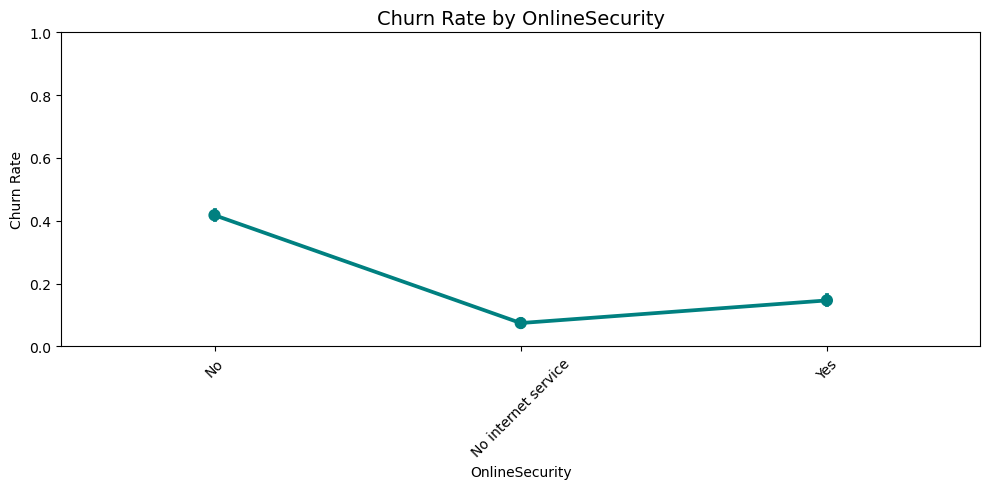

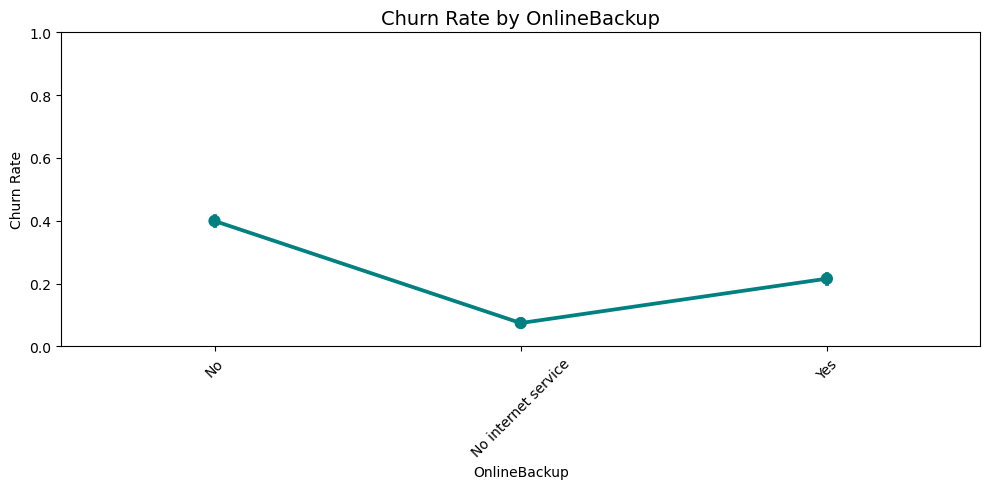

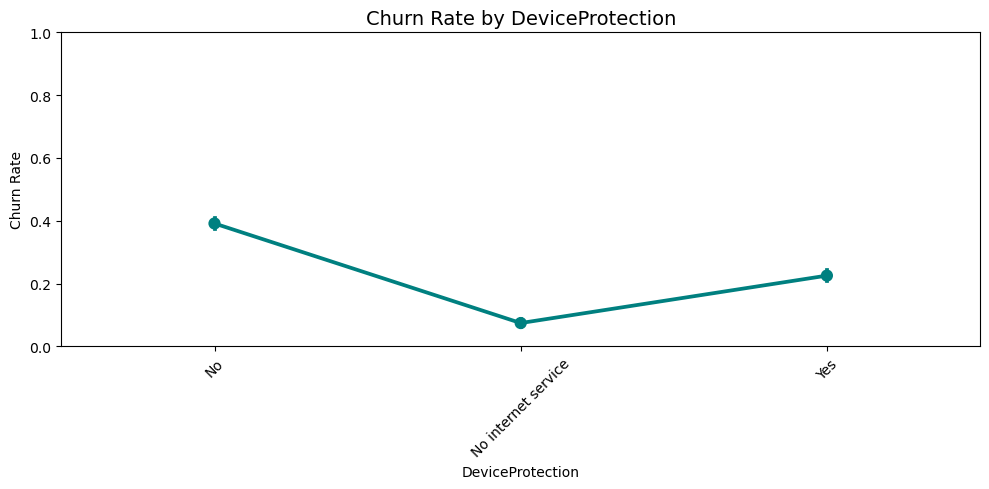

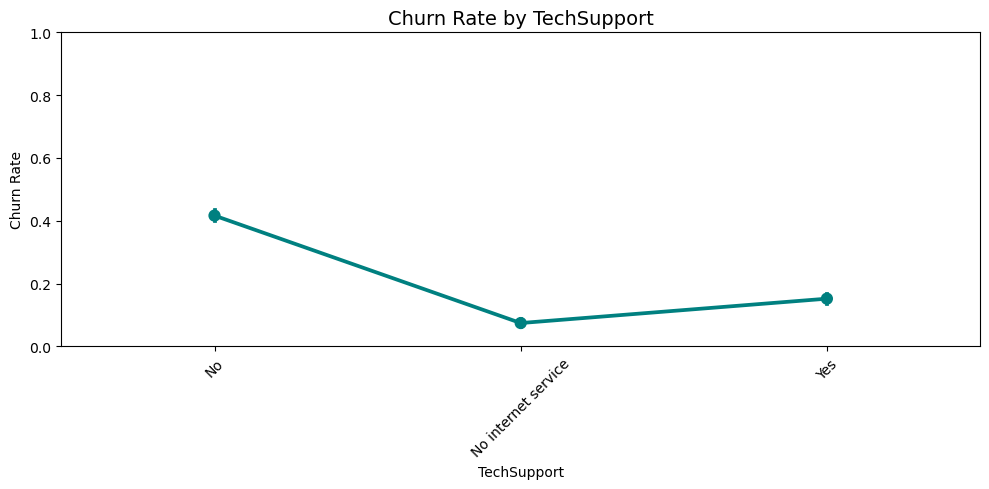

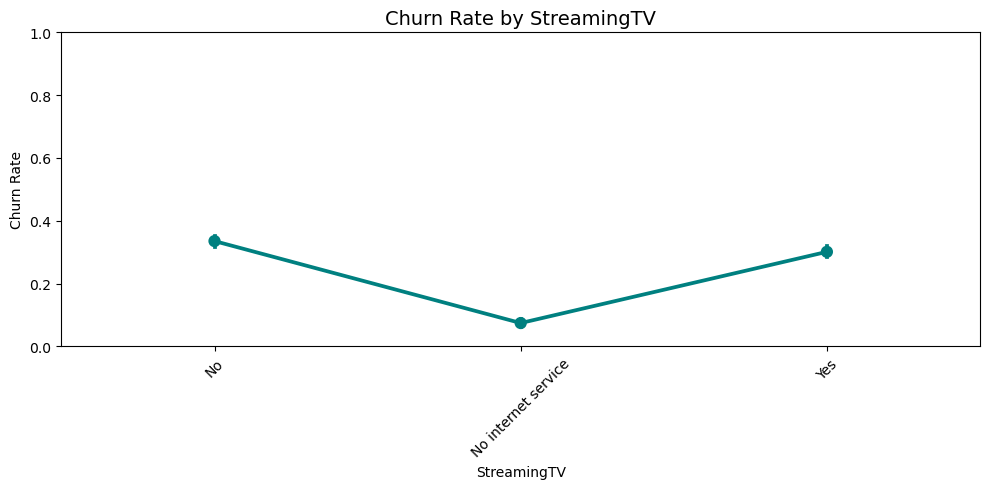

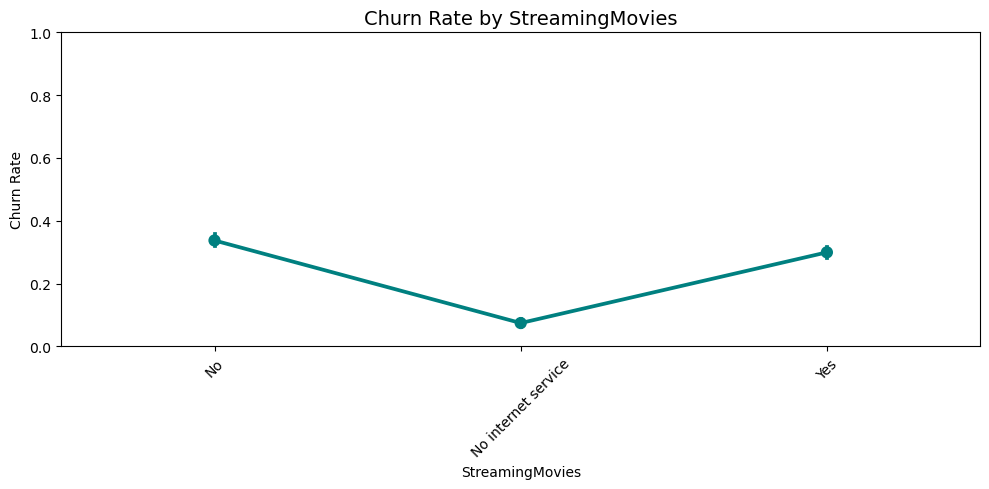

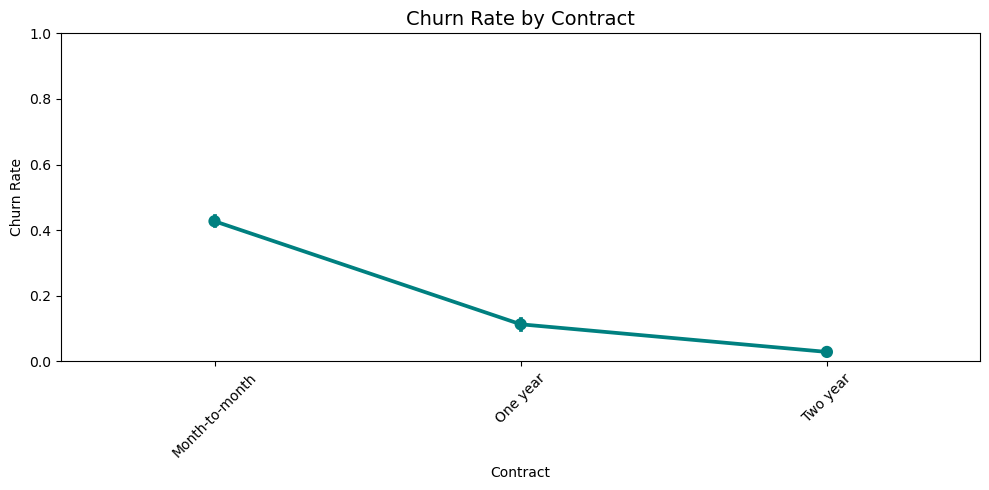

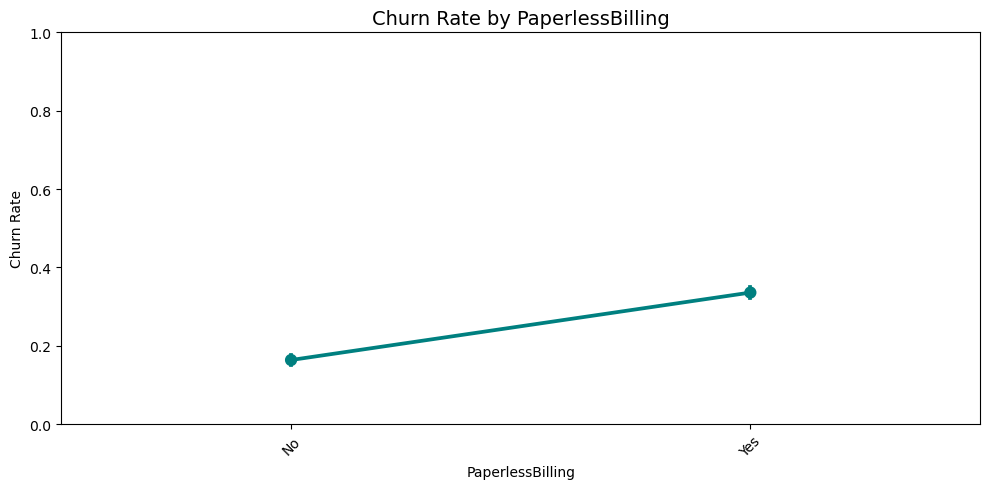

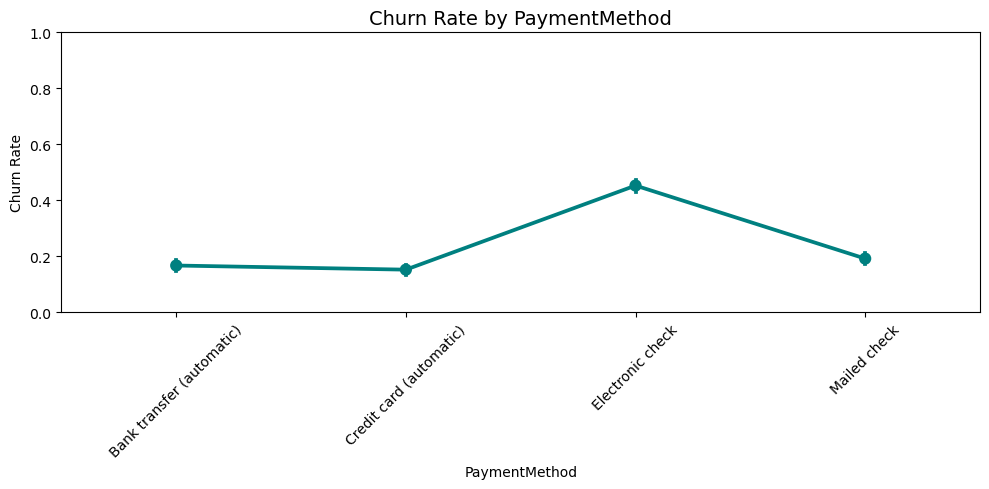

In [27]:
# Plot categorical features
for col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.pointplot(
        x=col, y='Churn', data=df_cat,
        order=sorted(df_cat[col].dropna().unique()),
        color='teal'
    )
    plt.ylim(0, 1)
    plt.title(f'Churn Rate by {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Churn Rate')
    plt.tight_layout()
    plt.show()

## Data Transforms (Remove Outliers, Power Transforms)

In [29]:
df.describe()

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,32.421786,64.798208,2283.300441
std,0.441782,0.368844,24.545260,30.085974,2266.771362
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,0.000000,9.000000,35.587500,401.450000
50%,0.000000,0.000000,29.000000,70.350000,1397.475000
75%,1.000000,0.000000,55.000000,89.862500,3794.737500
max,1.000000,1.000000,72.000000,118.750000,8684.800000


In [30]:
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y-mean)/std
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                           len([i for i in data
                                                               if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                          len([i for i in data
                                                              if i > data.quantile(.99)])))

In [31]:
# Determine what the upperbound should be for continuous features
for feat in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    detect_outlier(feat)


Outlier caps for tenure:
  --95p: 72.0 / 0 values exceed that
  --3sd: 106.1 / 0 values exceed that
  --99p: 72.0 / 0 values exceed that

Outlier caps for MonthlyCharges:
  --95p: 107.4 / 352 values exceed that
  --3sd: 155.0 / 0 values exceed that
  --99p: 114.7 / 71 values exceed that

Outlier caps for TotalCharges:
  --95p: 6923.6 / 352 values exceed that
  --3sd: 9083.1 / 0 values exceed that
  --99p: 8039.9 / 71 values exceed that


In [32]:
# Cap features
df['MonthlyCharges_clean'] = df['MonthlyCharges'].clip(upper=df['MonthlyCharges'].quantile(.99))
df['TotalCharges_clean'] = df['TotalCharges'].clip(upper=df['TotalCharges'].quantile(.99))

In [33]:
df.describe()

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MonthlyCharges_clean,TotalCharges_clean
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,32.421786,64.798208,2283.300441,64.784108,2280.743216
std,0.441782,0.368844,24.545260,30.085974,2266.771362,30.062046,2260.057164
min,0.000000,0.000000,1.000000,18.250000,18.800000,18.250000,18.800000
25%,0.000000,0.000000,9.000000,35.587500,401.450000,35.587500,401.450000
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,70.350000,1397.475000
75%,1.000000,0.000000,55.000000,89.862500,3794.737500,89.862500,3794.737500
max,1.000000,1.000000,72.000000,118.750000,8684.800000,114.734500,8039.883000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


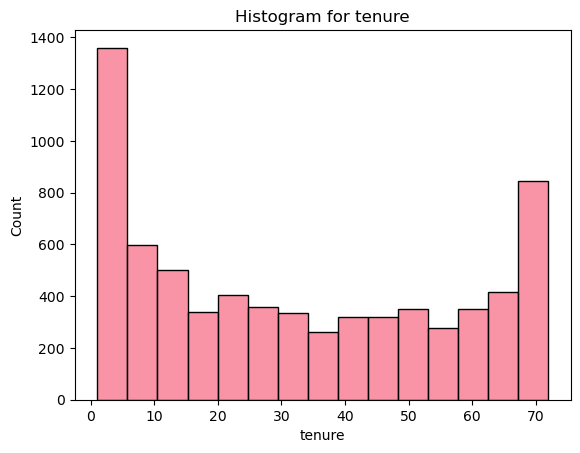

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


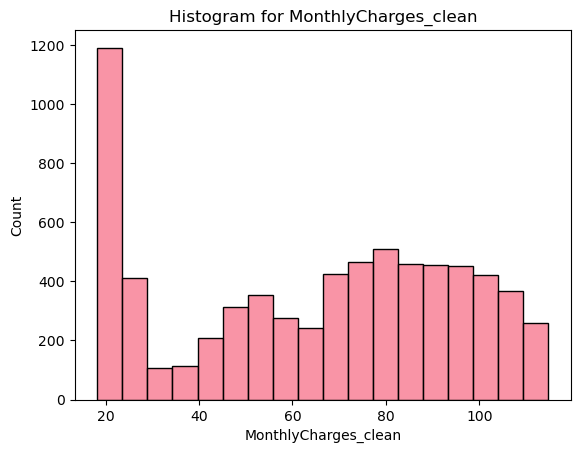

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


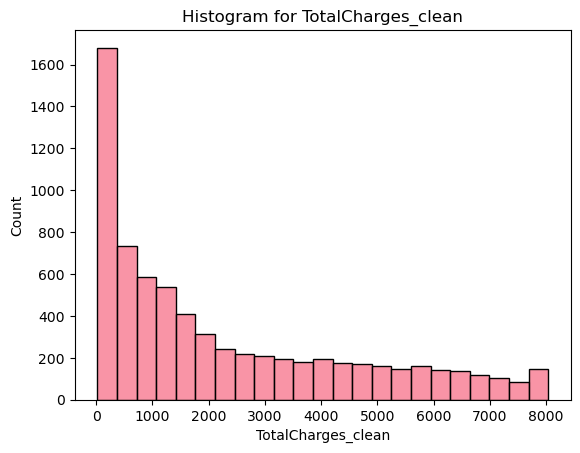

In [34]:
# Plot histogram for each continuous feature to see if a transformation is necessary
for feature in ['tenure', 'MonthlyCharges_clean', 'TotalCharges_clean']:
    sns.histplot(df[feature] ,kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

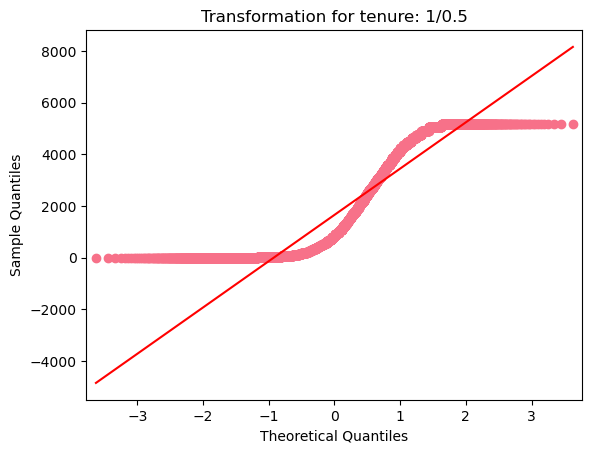

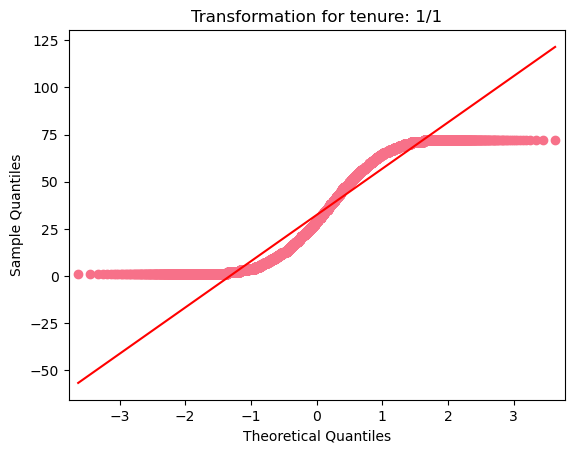

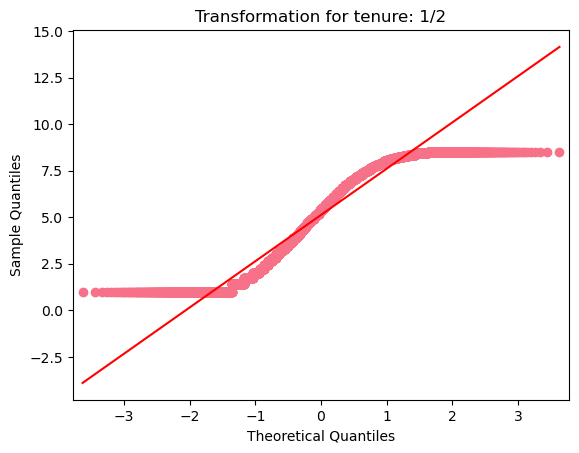

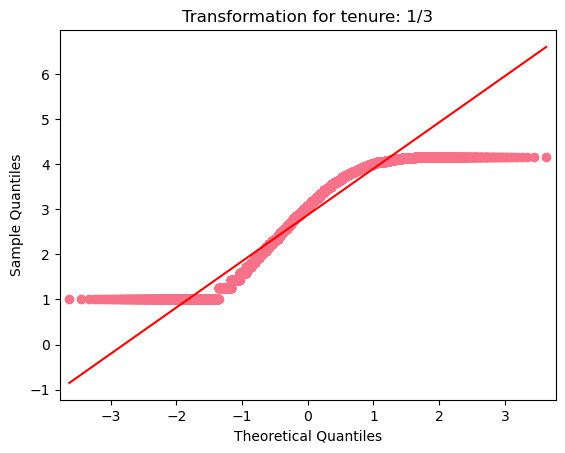

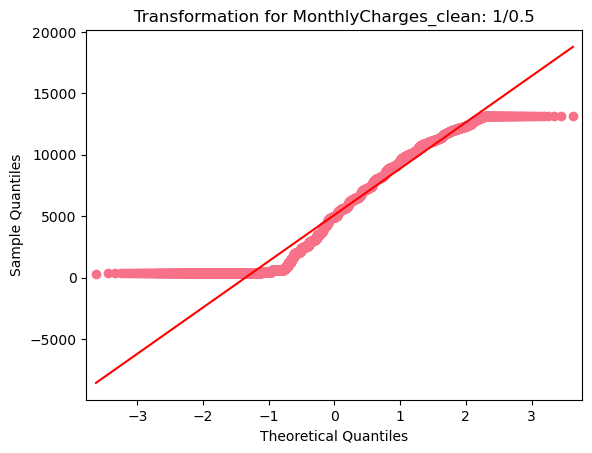

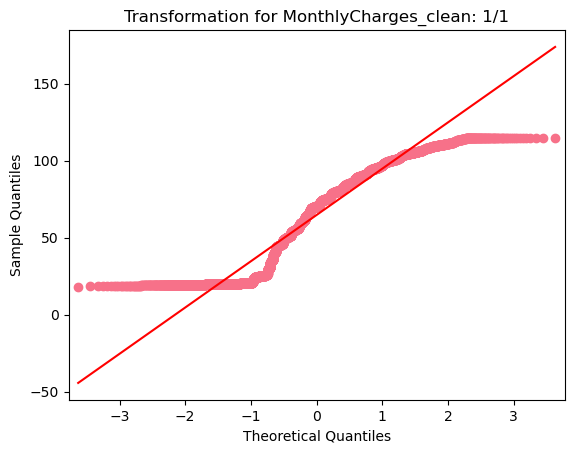

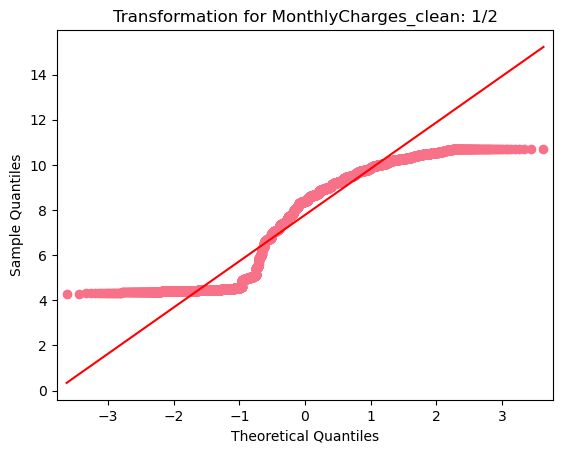

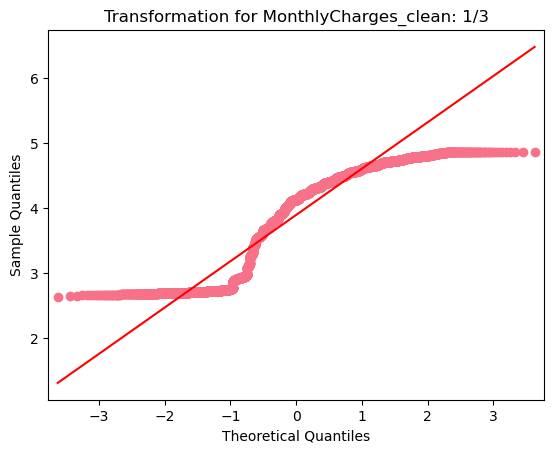

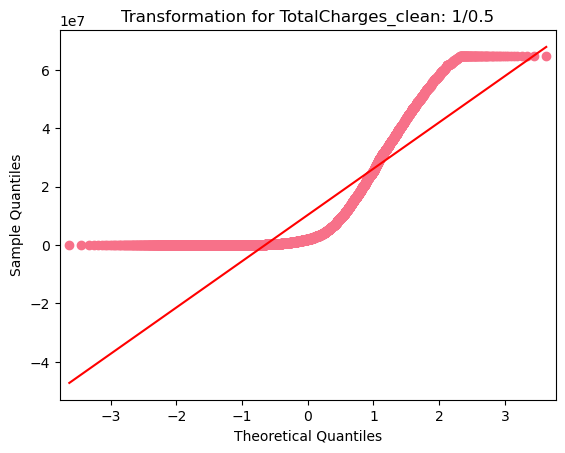

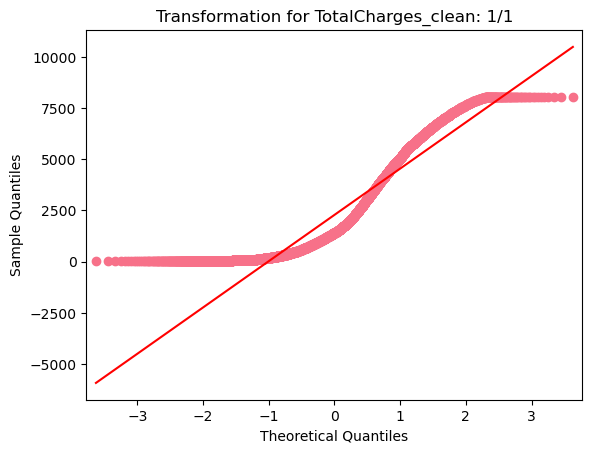

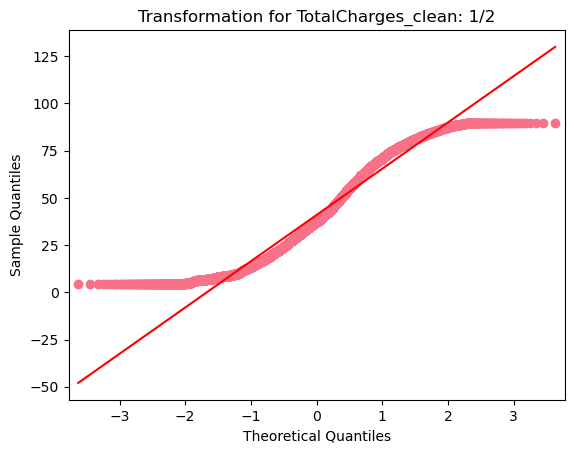

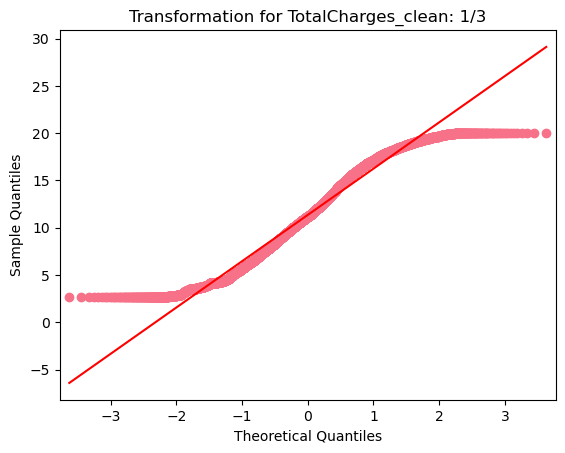

In [35]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats

# Generate QQ plots
for feature in ['tenure', 'MonthlyCharges_clean', 'TotalCharges_clean']:
    for i in [0.5, 1, 2, 3]:
        data_t = df[feature]**(1/i)
        qqplot(data_t, line='s')
        plt.title("Transformation for {}: 1/{}".format(feature ,str(i)))


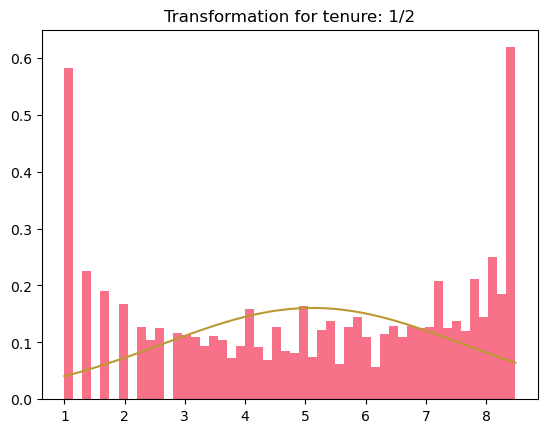

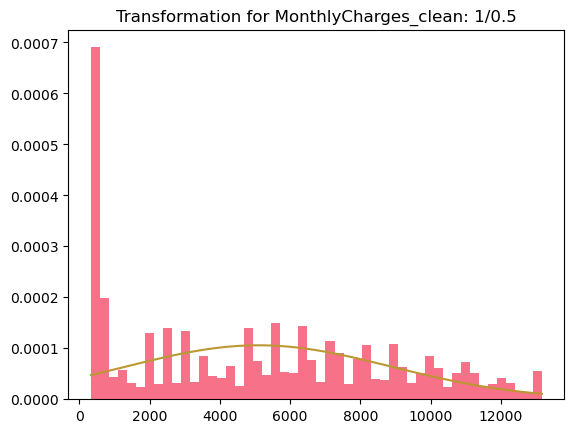

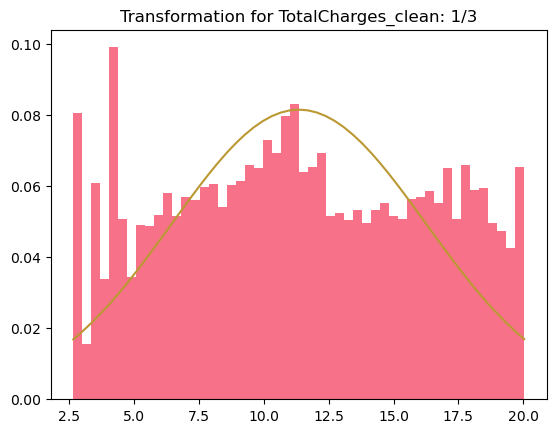

In [36]:
# Plotting Box-Cox Transformation    
data_t = df['tenure']**(1/2)
n, bins, patches = plt.hist(data_t, 50, density=True)
mu = np.mean(data_t)
sigma = np.std(data_t)
plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
plt.title("Transformation for {}: 1/{}".format('tenure', str(2)))
plt.show()

data_t = df['MonthlyCharges_clean']**(1/0.5)
n, bins, patches = plt.hist(data_t, 50, density=True)
mu = np.mean(data_t)
sigma = np.std(data_t)
plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
plt.title("Transformation for {}: 1/{}".format('MonthlyCharges_clean', str(0.5)))
plt.show()
    
data_t = df['TotalCharges_clean']**(1/3)
n, bins, patches = plt.hist(data_t, 50, density=True)
mu = np.mean(data_t)
sigma = np.std(data_t)
plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
plt.title("Transformation for {}: 1/{}".format('TotalCharges_clean', str(3)))
plt.show()


In [37]:
# Create new transformed features
df['tenure_tr'] = df['tenure'].apply(lambda x: x**(1/2))
df['MonthlyCharges_clean_tr'] = df['MonthlyCharges_clean'].apply(lambda x: x**(1/0.5))
df['TotalCharges_clean_tr'] = df['TotalCharges_clean'].apply(lambda x: x**(1/3))

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyCharges_clean,TotalCharges_clean,tenure_tr,MonthlyCharges_clean_tr,TotalCharges_clean_tr
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.85,29.85,1.000000,891.0225,3.102045
1,0,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,56.95,1889.50,5.830952,3243.3025,12.362766
2,1,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,53.85,108.15,1.414214,2899.8225,4.764407
3,0,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,42.30,1840.75,6.708204,1789.2900,12.255516
4,1,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,70.70,151.65,1.414214,4998.4900,5.332704


## Feature Engineering
- Encode features with binary string values(gender, partner, dependents, etc.)
- One-hot encode Contract feature
- Group add on services together
- Separate internet users, phone users, and all-in-one bundles
- Simplify payment method to electronic to non-electronic
- Combine Partner/Dependents to get family profiles
- Add paperless billing feature - they could churn differently
- Capture lifetime value of customers & Average charge per service


In [39]:
# Check how many unique values are in each feature to determine how to encode
df.nunique()

Churn                         2
gender                        2
SeniorCitizen                 2
Partner                       2
Dependents                    2
tenure                       72
PhoneService                  2
MultipleLines                 3
InternetService               3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtection              3
TechSupport                   3
StreamingTV                   3
StreamingMovies               3
Contract                      3
PaperlessBilling              2
PaymentMethod                 4
MonthlyCharges             1584
TotalCharges               6530
MonthlyCharges_clean       1541
TotalCharges_clean         6460
tenure_tr                    72
MonthlyCharges_clean_tr    1541
TotalCharges_clean_tr      6460
dtype: int64

In [40]:
# encode gender feature
df['gender'] = (df['gender'] == 'Male').astype(int)

In [41]:
# encode binary features that are Yes or No to 1 and 0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    df[col] = (df[col] == 'Yes').astype(int)

In [42]:
# Create Internet flag
df['HasInternet'] = (df['InternetService'] != 'No').astype(int)

# Create column for types of internet services
df['is_DSL'] = (df['InternetService'] == 'DSL').astype(int)
df['is_Fiber_optic'] = (df['InternetService'] == 'Fiber optic').astype(int)

In [43]:
# Encode MultipleLines feature
df['MultipleLines_New'] = df['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})

In [44]:
# Ordinally encode Contract
df['Contract_New'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [45]:
# Sub-service usage, gated by having internet
subservices = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in subservices:
    df[f'{col}_New'] = np.where(
        df['InternetService'] == 'No',
        0,                          # not applicable when no internet
        (df[col] == 'Yes').astype(int)  # actual usage when internet exists
    )

In [46]:
# Count “Yes” for each add‑on service + internet flag
service_cols = [
    'PhoneService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df['num_services'] = df[service_cols].eq('Yes').sum(axis=1) + df['HasInternet']

In [47]:
# Create feature showing life time value and average charge per service
df['LTV_Estimate']           = df['MonthlyCharges'] * df['tenure']
df['AVG_Charge_Per_Service']  = (df['MonthlyCharges'] / (df['num_services'] + 1e-3)).round(2)

In [48]:
# creating a family feature based on they have a partner and have dependents
df['Family_Flag'] = ((df['Partner'] == 1) & (df['Dependents'] == 1)).astype(int)

In [49]:
# Drop columns that will no longer be used
drop_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines',
             'InternetService', 'PaymentMethod', 'Contract']
df = df.drop(columns=drop_cols)

In [50]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MonthlyCharges_clean,TotalCharges_clean,tenure_tr,MonthlyCharges_clean_tr,TotalCharges_clean_tr,HasInternet,is_DSL,is_Fiber_optic,MultipleLines_New,Contract_New,OnlineSecurity_New,OnlineBackup_New,DeviceProtection_New,TechSupport_New,StreamingTV_New,StreamingMovies_New,num_services,LTV_Estimate,AVG_Charge_Per_Service,Family_Flag
0,0,0,0,1,0,1,0,1,29.85,29.85,29.85,29.85,1.000000,891.0225,3.102045,1,1,0,0,0,0,1,0,0,0,0,2,29.85,14.92,0
1,0,1,0,0,0,34,1,0,56.95,1889.50,56.95,1889.50,5.830952,3243.3025,12.362766,1,1,0,1,1,1,0,1,0,0,0,3,1936.30,18.98,0
2,1,1,0,0,0,2,1,1,53.85,108.15,53.85,108.15,1.414214,2899.8225,4.764407,1,1,0,1,0,1,1,0,0,0,0,3,107.70,17.94,0
3,0,1,0,0,0,45,0,0,42.30,1840.75,42.30,1840.75,6.708204,1789.2900,12.255516,1,1,0,0,1,1,0,1,1,0,0,4,1903.50,10.57,0
4,1,0,0,0,0,2,1,1,70.70,151.65,70.70,151.65,1.414214,4998.4900,5.332704,1,0,1,1,0,0,0,0,0,0,0,1,141.40,70.63,0


In [51]:
df.nunique()

Churn                         2
gender                        2
SeniorCitizen                 2
Partner                       2
Dependents                    2
tenure                       72
PhoneService                  2
PaperlessBilling              2
MonthlyCharges             1584
TotalCharges               6530
MonthlyCharges_clean       1541
TotalCharges_clean         6460
tenure_tr                    72
MonthlyCharges_clean_tr    1541
TotalCharges_clean_tr      6460
HasInternet                   2
is_DSL                        2
is_Fiber_optic                2
MultipleLines_New             3
Contract_New                  3
OnlineSecurity_New            2
OnlineBackup_New              2
DeviceProtection_New          2
TechSupport_New               2
StreamingTV_New               2
StreamingMovies_New           2
num_services                  8
LTV_Estimate               6050
AVG_Charge_Per_Service     2152
Family_Flag                   2
dtype: int64

## Split Into Train, Test and Validation Sets

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Splitting data into training, testing, and validation sets
features = df.drop(['Churn'], axis=1)
labels = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MonthlyCharges_clean,TotalCharges_clean,tenure_tr,MonthlyCharges_clean_tr,TotalCharges_clean_tr,HasInternet,is_DSL,is_Fiber_optic,MultipleLines_New,Contract_New,OnlineSecurity_New,OnlineBackup_New,DeviceProtection_New,TechSupport_New,StreamingTV_New,StreamingMovies_New,num_services,LTV_Estimate,AVG_Charge_Per_Service,Family_Flag
3946,0,0,0,0,9,0,0,58.50,539.85,58.50,539.85,3.000000,3422.2500,8.142499,1,1,0,0,0,1,0,1,1,1,1,6,526.50,9.75,0
3394,1,0,0,0,26,1,0,61.55,1581.95,61.55,1581.95,5.099020,3788.4025,11.651922,1,1,0,2,1,1,1,0,0,0,0,3,1600.30,20.51,0
1635,0,0,0,0,3,1,1,69.95,220.45,69.95,220.45,1.732051,4893.0025,6.040924,1,1,0,1,1,0,0,1,0,1,1,4,209.85,17.48,0
4088,1,0,0,0,7,1,0,73.60,520.00,73.60,520.00,2.645751,5416.9600,8.041452,1,0,1,2,0,0,0,0,0,0,0,1,515.20,73.53,0
1886,1,0,1,1,67,1,1,60.40,3953.70,60.40,3953.70,8.185353,3648.1600,15.812525,1,1,0,1,2,1,0,1,1,0,0,4,4046.80,15.10,1


In [55]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.7
0.15
0.15


## Write Out All Data

In [57]:
X_train.to_csv('~/Documents/GitHub/telco-churn-analysis/data/train_features.csv', index=False)
X_val.to_csv('~/Documents/GitHub/telco-churn-analysis/data/val_features.csv', index=False)
X_test.to_csv('~/Documents/GitHub/telco-churn-analysis/data/test_features.csv', index=False)

y_train.to_csv('~/Documents/GitHub/telco-churn-analysis/data/train_labels.csv', index=False)
y_val.to_csv('~/Documents/GitHub/telco-churn-analysis/data/val_labels.csv', index=False)
y_test.to_csv('~/Documents/GitHub/telco-churn-analysis/data/test_labels.csv', index=False)